# Titanic数据探索

## 思考问题
有哪些因素会让船上的人，生还率更高？

## 数据加载

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# 加载数据集
full_data = pd.read_csv('titanic-data.csv')

# 显示数据列表中的前几项乘客数据
display(full_data.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


从加载进来的数据可以看出，每个乘客的基本特征有：
- **PassengerId**：乘客ID
- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄（存在 `NaN`缺失值）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（存在 `NaN`缺失值）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

查看前10条数据中可以发现，有些数据是`NaN`，看一下有多少数据是`NaN`。

In [2]:
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

年龄（**Age**）缺失值177条，船舱编号（**Cabin**）缺失值687条，上船港口（**Embarked**）缺失值2条。船舱编号的数据缺失太多，个人感觉与存活率也没有什么关系，所以不考虑。年龄的话，考虑小孩或老人的存活几率会更高，因为出于绅士风度，会把活的机会让出来，所以值得挖掘一下。上船的港口，个人觉得也没有什么相关性，反而是**Pclass**社会地位高的人，可能更有生还的几率，这也只是个人的猜测。

选择几个个人感觉具有相关性的特征数据：

In [3]:
full_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 处理缺失值

先处理年龄的缺失数据，平均数不合适，我选择中位数对缺失数据进行填充。

In [4]:
age_median = full_data[['Age']].median()
print age_median

Age    28.0
dtype: float64


In [30]:
# 直接修改数据进行填充
# 使用median填充Age的缺失值，但是总是没有效果，不知道是怎么回事，
# Mac环境目录p4的权限都加了，`sudo chmod -R 777 p4/`
full_data[['Age']].fillna(age_median[0], inplace=True)
full_data[['Age']].describe()

/Users/kevin/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


## 数据探索

先了解一下有多少人是活下来的

存活率为38.38 %， 人数是 342


/Users/kevin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


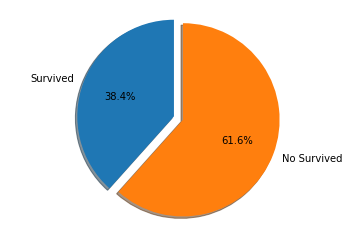

In [6]:
all_survived = len([s for s in full_data['Survived'] if s == 1 ])
survived_rate = 1.0 * all_survived / len(full_data['Survived']) * 100 
print '存活率为%.2f'%survived_rate,'%，', '人数是',all_survived

# Pie chart
labels = 'Survived', 'No Survived'
sizes = [all_survived, len(full_data['Survived']) - all_survived]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

参考：[Basic Pie Sample](https://matplotlib.org/api/pyplot_api.html)

#### 女性的存活率是不是会更高呢？

In [9]:
sex_total = full_data.groupby(['Sex']).count()['Survived']
sex_survived = full_data.groupby(['Sex']).sum()['Survived']
print '男女性别总数：'
print sex_total
print '存活下来的男女性别数：'
print sex_survived

男女性别总数：
Sex
female    314
male      577
Name: Survived, dtype: int64
存活下来的男女性别数：
Sex
female    233
male      109
Name: Survived, dtype: int64


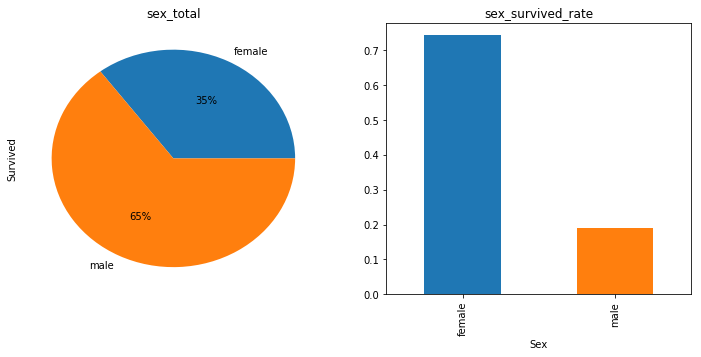

男女生存率：
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [28]:
sex_rate = sex_survived / sex_total
plt.figure(figsize=(12,5))
plt.subplot(121)
sex_total.plot(kind='pie', autopct='%.0f%%')
plt.title('sex_total')

plt.subplot(122)
sex_rate.plot(kind='bar')
plt.title('sex_survived_rate')
plt.show()
print '男女生存率：'
print sex_rate

从图上可以看出，总数的比例男性是65%，女性是35%，但男性的存活率只有19%，说明女性存活的几率远高于男性，可能是男性处于绅士风度，把生的机会给了女性。

#### 年龄是否与存活率相关

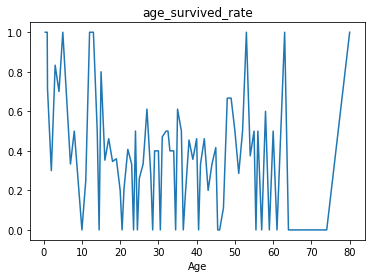

In [31]:
age_total = full_data.groupby(['Age']).count()['Survived']
age_survived = full_data.groupby(['Age']).sum()['Survived']
age_rate = age_survived / age_total
age_rate.plot()
plt.title('age_survived_rate')
plt.show()

根据图中所示年龄在0-80之间，间隔为10一组。

In [32]:
bins = np.arange(0,80,10)
age_cut = pd.cut(full_data['Age'], bins)
# print age_cut
age_group = full_data.groupby(age_cut)
# print age_group
age_survived_by_group = age_group.sum()['Survived']
age_total_by_group = age_group.count()['Survived']
age_survived_rate = age_survived_by_group / age_total_by_group
print '各年龄段人数：'
print age_total_by_group
print '各年龄段的生存率：'
print age_survived_rate

各年龄段人数：
Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
Name: Survived, dtype: int64
各年龄段的生存率：
Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
Name: Survived, dtype: float64


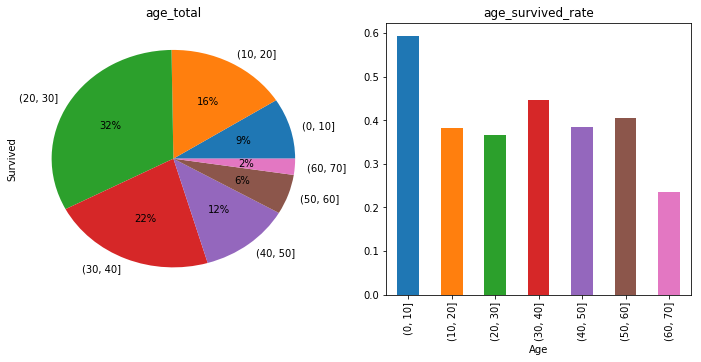

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(121)
age_total_by_group.plot(kind='pie', autopct='%.0f%%')
plt.title('age_total')

plt.subplot(122)
age_survived_rate.plot(kind='bar')
plt.title('age_survived_rate')
plt.show()

从存活率上看，小于10岁的儿童存活率最高，其次是30-40岁的中年人，60-70岁的老年人存活率最低，说明在灾难面前，除了自己保命之外，更希望孩子可以生存下去，而不是老人。

## 总结

整体来说，生存率只有38%，**Cabin**的缺失值太多，忽略其影响因素，其他的因素有很多，主要分析了**Age**和**Sex**2个特征。通过分析**Sex**特征，发现女性的总数只有35%，但是存活率却有74%，表明男士会展现绅士风度，把生存机会让个女士。**Age**有部分数据缺失，使用中位数填充。年龄在（0-10）的儿童，相对其他年龄段的人，生存率最高，有59%，说明人们希望把生存机会留个孩子。

本报告中使用的数据并不是全部数据，只有891人，但实际的全部人数有2207人，不到50%的样本数量可能会对结论有影响，取决于抽样数据的随机性。**Age**特征有177条数据缺失，虽然使用中位数填充，但也可能影响分析结果。还有其他的影响因素，比如**Pclass**,**SibSp**,**Parch**等，未做分析，但也可能是影响存活率的因素。

参考：
- [探索数据集](https://blog.csdn.net/PatrickZheng/article/details/73843594)
- [优达学城探索数据集项目](https://zhuanlan.zhihu.com/p/32582696)